In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ai_job_trends_dataset.csv to ai_job_trends_dataset.csv


In [ ]:
# Install required libraries (run once)
!pip install seaborn

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/ai_job_trends_dataset.csv')  # update path if needed
df.head()


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

,0
Job Title,0
Industry,0
Job Status,0
AI Impact Level,0
Median Salary (USD),0
Required Education,0
Experience Required (Years),0
Job Openings (2024),0
Projected Openings (2030),0
Remote Work Ratio (%),0


In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [8]:
df.columns


Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')

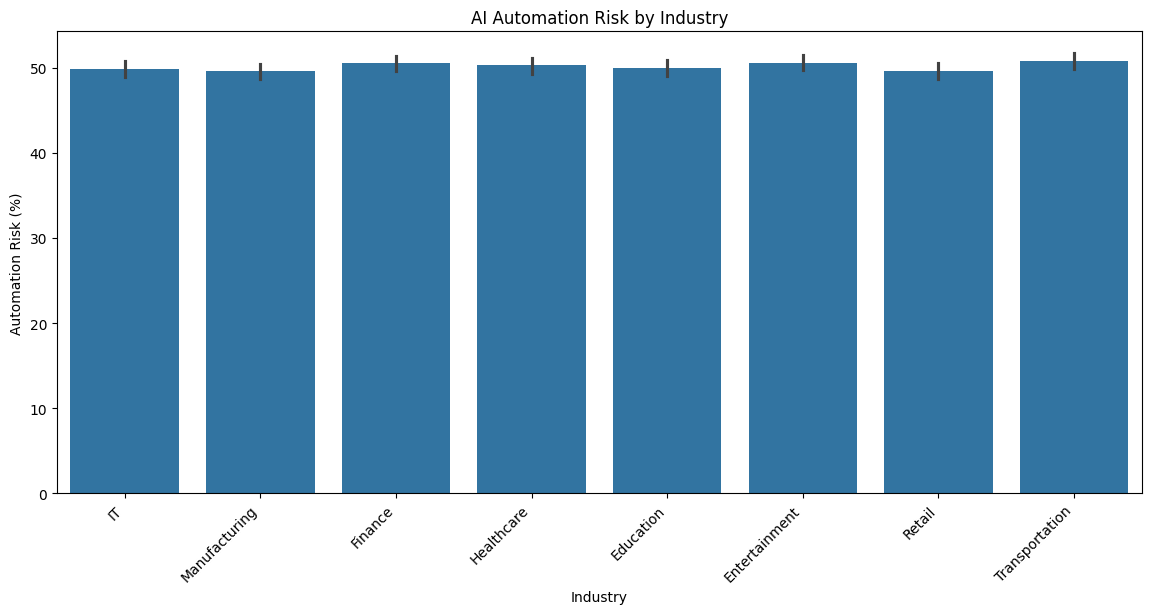

In [9]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Industry', y='Automation Risk (%)')
plt.xticks(rotation=45, ha='right')
plt.title("AI Automation Risk by Industry")
plt.ylabel("Automation Risk (%)")
plt.xlabel("Industry")
plt.show()


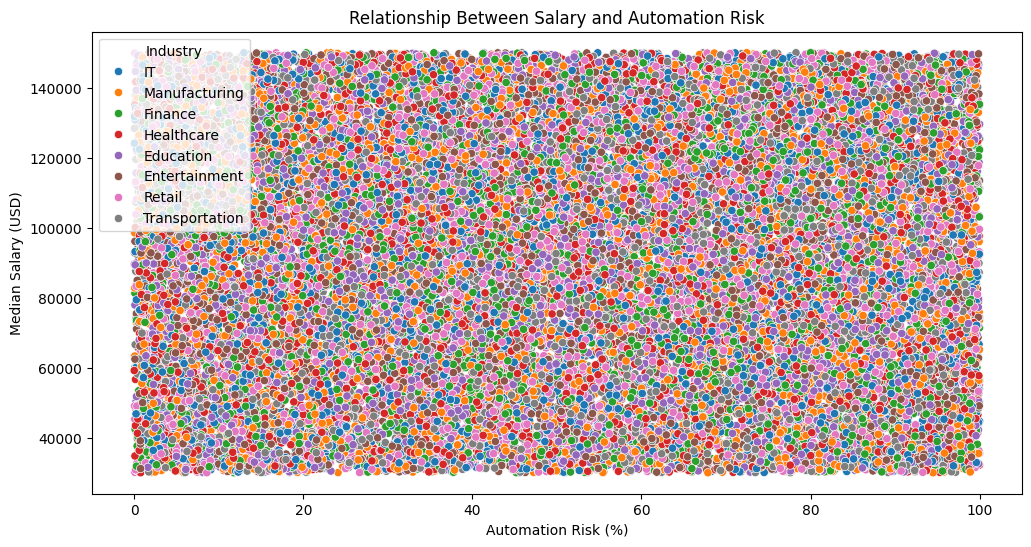

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Automation Risk (%)', y='Median Salary (USD)', hue='Industry')
plt.title("Relationship Between Salary and Automation Risk")
plt.xlabel("Automation Risk (%)")
plt.ylabel("Median Salary (USD)")
plt.show()


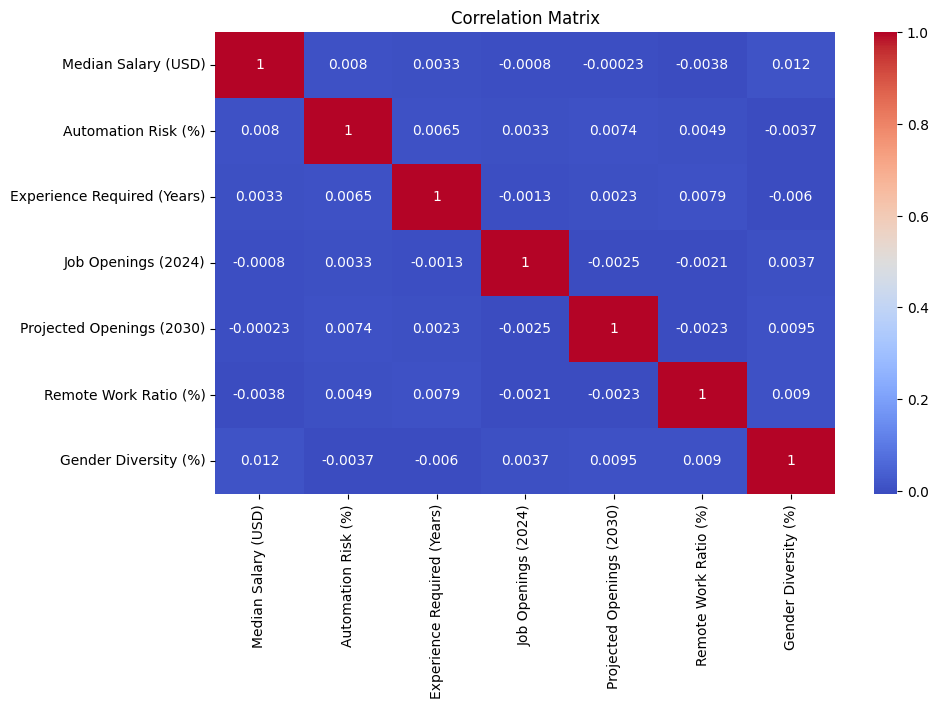

In [11]:
plt.figure(figsize=(10,6))
num_df = df[['Median Salary (USD)', 'Automation Risk (%)', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)',
             'Remote Work Ratio (%)', 'Gender Diversity (%)']]
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [12]:
X = df[['Automation Risk (%)']]
y = df['Median Salary (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: -0.0002939772577852384
RMSE: 34435.22245731807


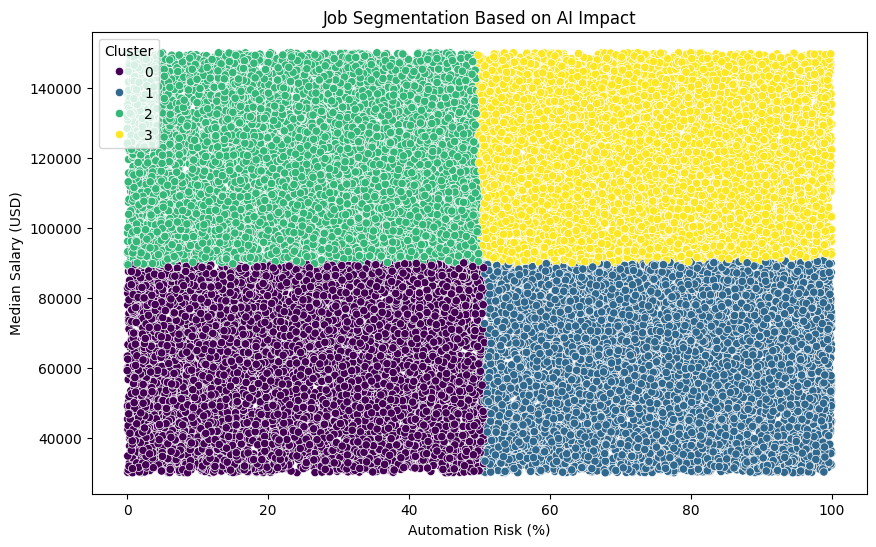

In [13]:
features = df[['Automation Risk (%)','Median Salary (USD)']]
scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Automation Risk (%)', y='Median Salary (USD)', hue='Cluster', palette='viridis')
plt.title("Job Segmentation Based on AI Impact")
plt.show()


In [14]:
print("Top 5 Industries Most at Risk of Automation:")
print(df.groupby('Industry')['Automation Risk (%)'].mean().sort_values(ascending=False).head())

print("\nLowest Risk (Future-Safe) Industries:")
print(df.groupby('Industry')['Automation Risk (%)'].mean().sort_values().head())

print("\nIndustries with Highest Median Salary:")
print(df.groupby('Industry')['Median Salary (USD)'].mean().sort_values(ascending=False).head())


Top 5 Industries Most at Risk of Automation:
Industry
Transportation    50.790645
Entertainment     50.587905
Finance           50.506203
Healthcare        50.267560
Education         50.013546
Name: Automation Risk (%), dtype: float64

Lowest Risk (Future-Safe) Industries:
Industry
Manufacturing    49.586010
Retail           49.608512
IT               49.876338
Education        50.013546
Healthcare       50.267560
Name: Automation Risk (%), dtype: float64

Industries with Highest Median Salary:
Industry
IT               90941.672551
Retail           90903.677461
Finance          90510.599371
Entertainment    90131.000994
Manufacturing    89880.034508
Name: Median Salary (USD), dtype: float64


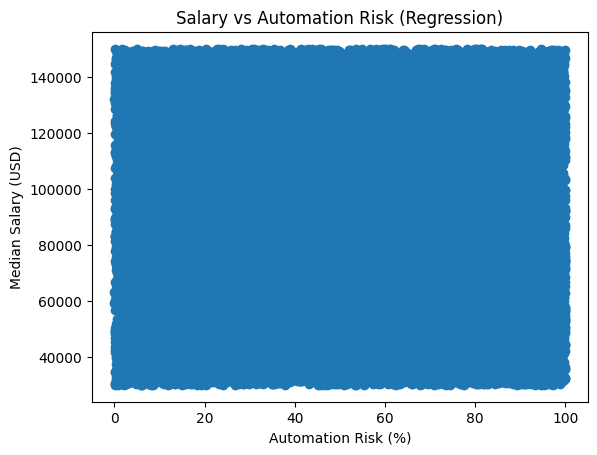

In [15]:
plt.scatter(df['Automation Risk (%)'], df['Median Salary (USD)'])
plt.plot(X, model.predict(X), linewidth=2)
plt.title("Salary vs Automation Risk (Regression)")
plt.xlabel("Automation Risk (%)")
plt.ylabel("Median Salary (USD)")
plt.show()


In [17]:
cluster_summary = df.groupby('Cluster')[['Automation Risk (%)','Median Salary (USD)']].mean()
cluster_summary


,Automation Risk (%),Median Salary (USD)
Cluster,,
0,25.619252,60239.696525
1,75.630592,60092.352122
2,25.197756,119129.838518
3,74.772997,120210.402741


from matplotlib import pyplot as plt
cluster_summary['Automation Risk (%)'].plot(kind='hist', bins=20, title='Automation Risk (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['Median Salary (USD)'].plot(kind='hist', bins=20, title='Median Salary (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary.plot(kind='scatter', x='Automation Risk (%)', y='Median Salary (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['Automation Risk (%)'].plot(kind='line', figsize=(8, 4), title='Automation Risk (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['Median Salary (USD)'].plot(kind='line', figsize=(8, 4), title='Median Salary (USD)')
plt.gca().spines[['top', 'right']].set_visible(False)